In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
# Convert Total Charges to numeric
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")

# Convert Tenure Months to numeric
df["Tenure Months"] = pd.to_numeric(df["Tenure Months"], errors="coerce")

df[["Total Charges", "Tenure Months"]].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Total Charges  7032 non-null   float64
 1   Tenure Months  7043 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


In [6]:
df.isna().sum()


CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [7]:
df["Churn Label"].value_counts()
df["Churn Value"].value_counts()


Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [8]:
df["Churn Label"].value_counts()
df["Churn Value"].value_counts()


Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_excel("../data/raw/telco_churn.xlsx")

df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


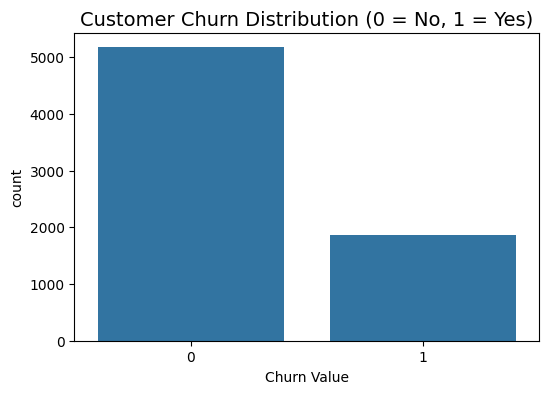

Churn Value
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x="Churn Value", data=df)
plt.title("Customer Churn Distribution (0 = No, 1 = Yes)", fontsize=14)
plt.show()

df["Churn Value"].value_counts(normalize=True)


In [10]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
numeric_cols


Index(['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months',
       'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score',
       'CLTV'],
      dtype='object')

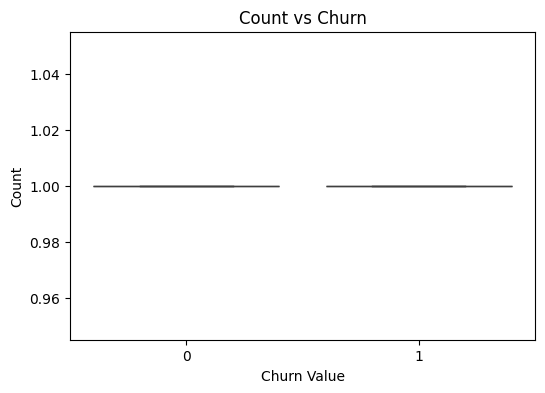

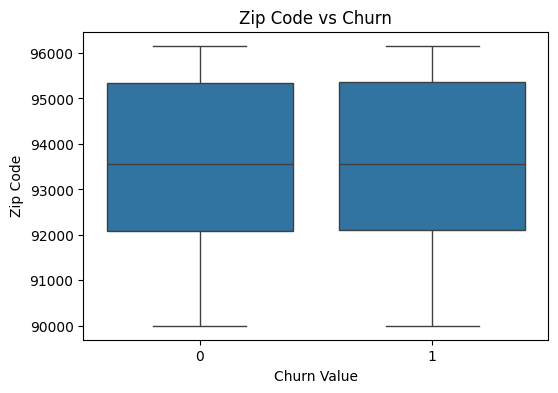

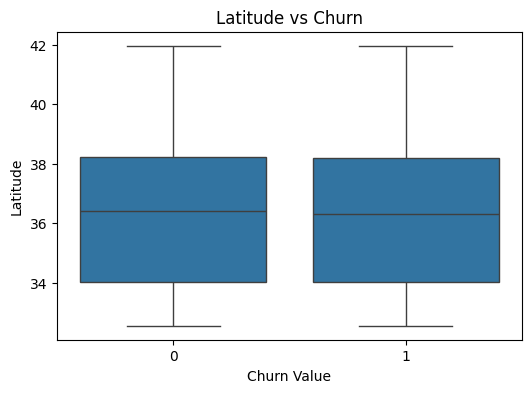

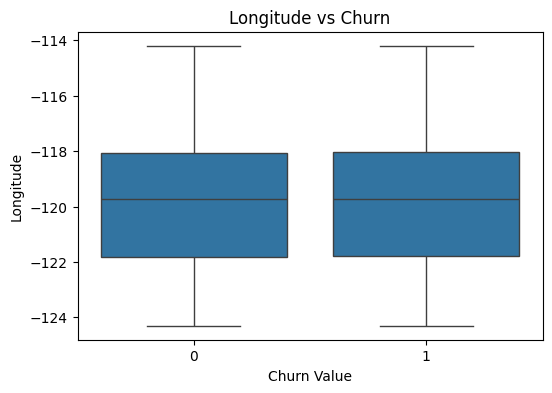

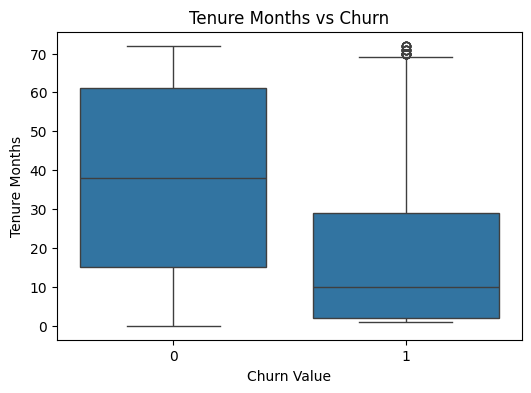

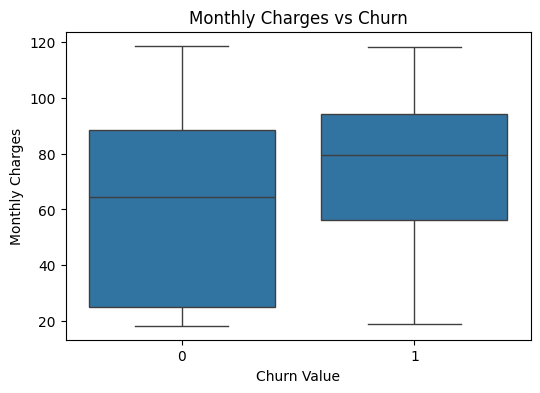

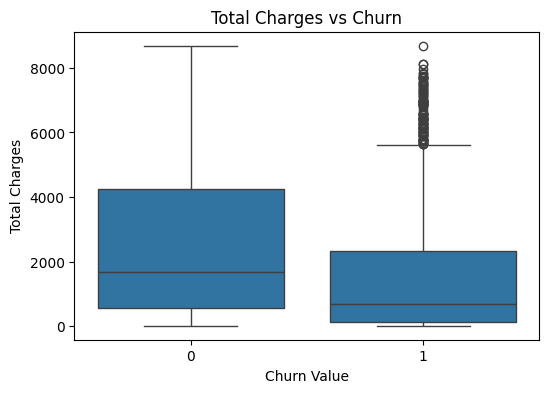

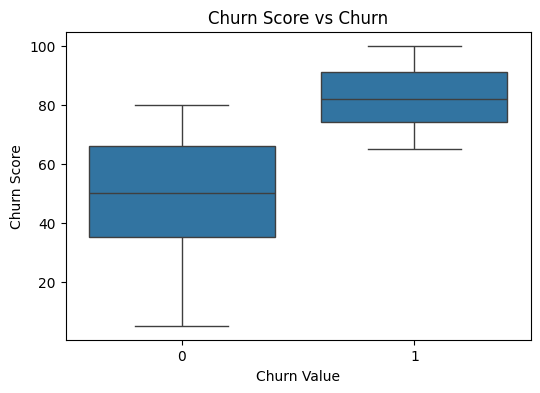

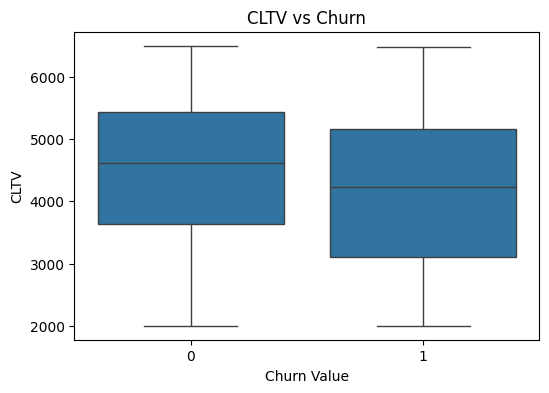

In [11]:
for col in numeric_cols:
    if col not in ["Churn Value"]:
        plt.figure(figsize=(6,4))
        sns.boxplot(x="Churn Value", y=col, data=df)
        plt.title(f"{col} vs Churn")
        plt.show()


In [12]:
cat_cols = df.select_dtypes(include=["object"]).columns
cat_cols


Index(['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Churn Label', 'Churn Reason'],
      dtype='object')

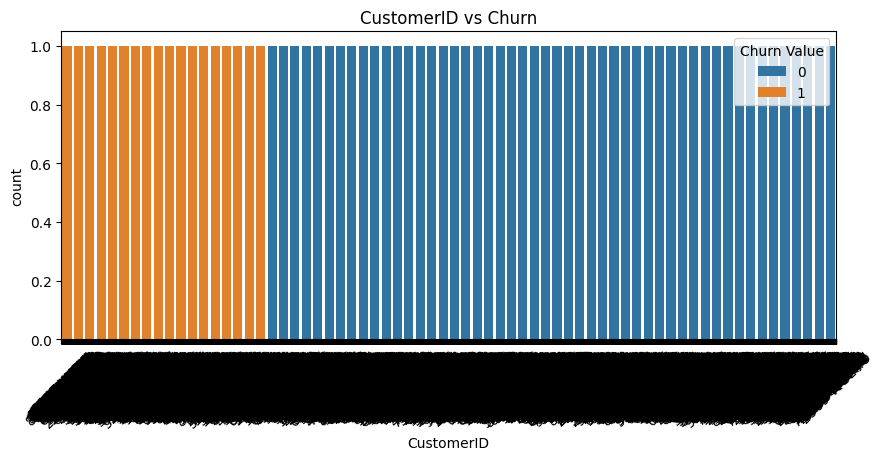

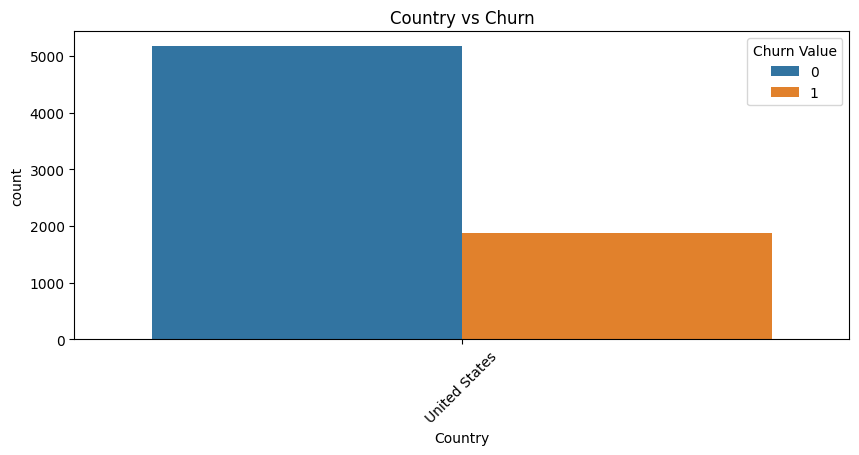

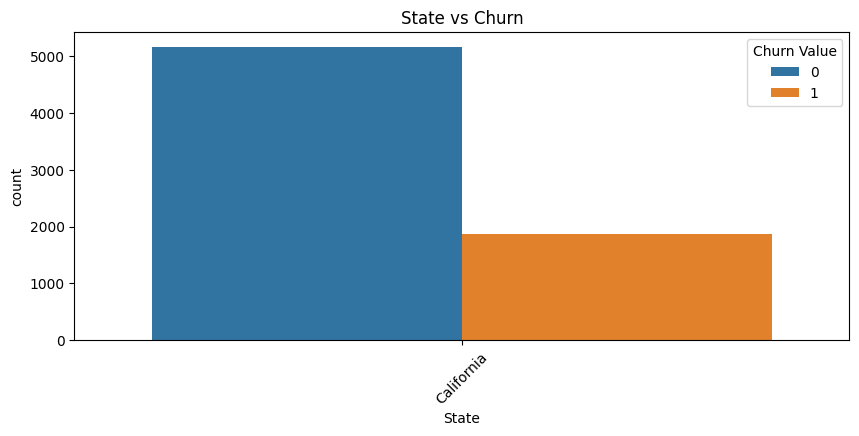

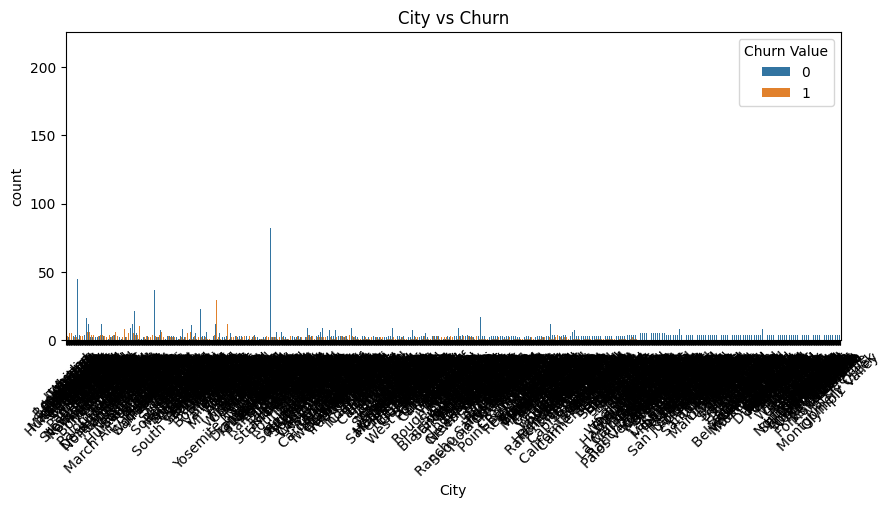

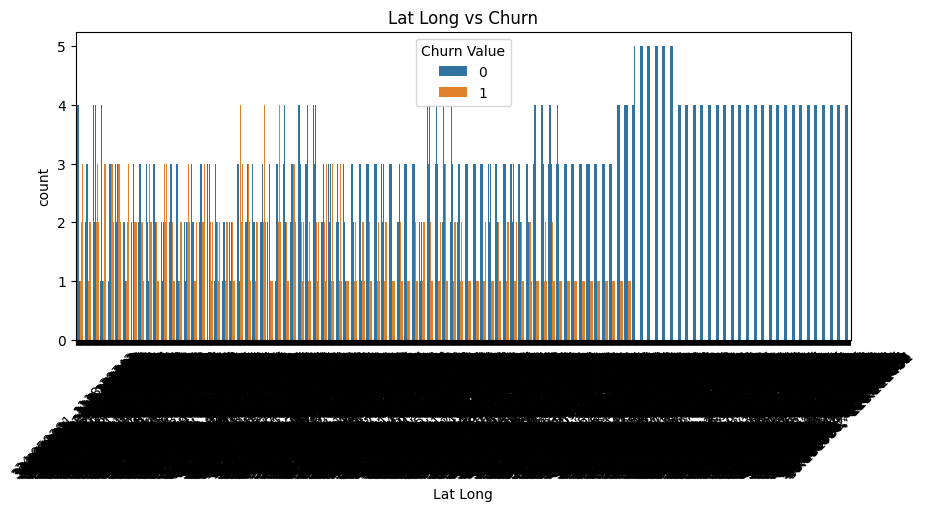

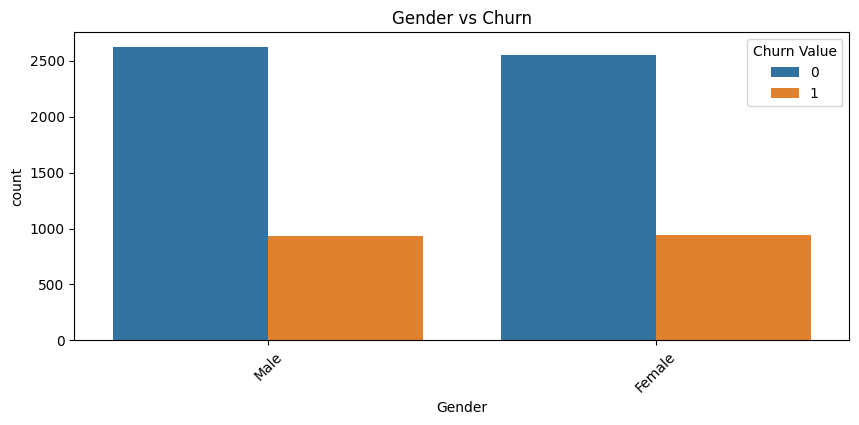

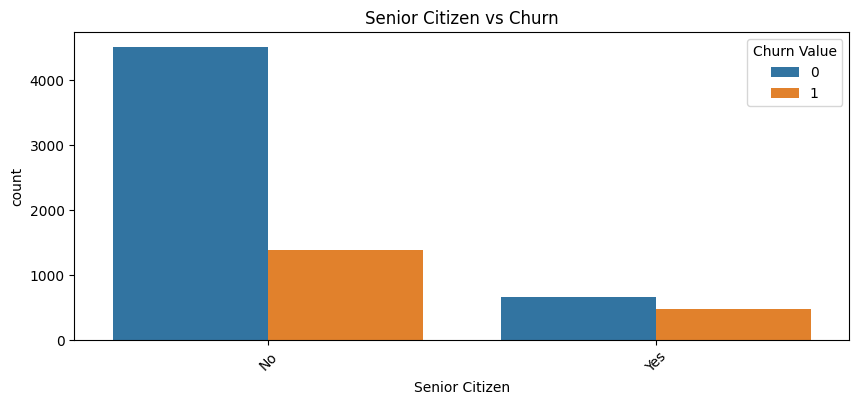

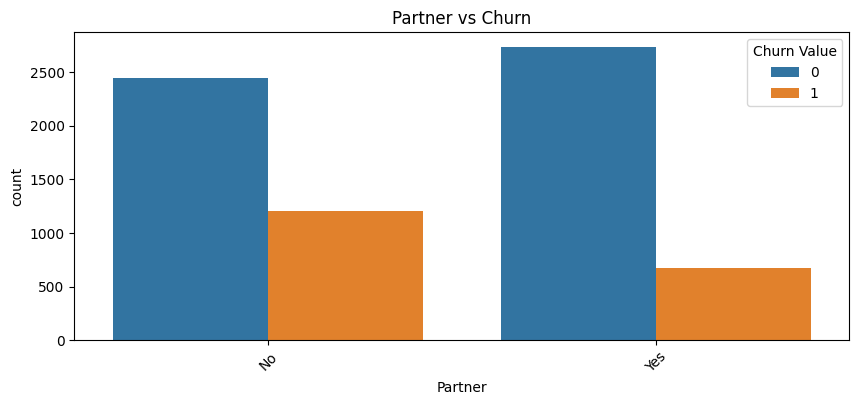

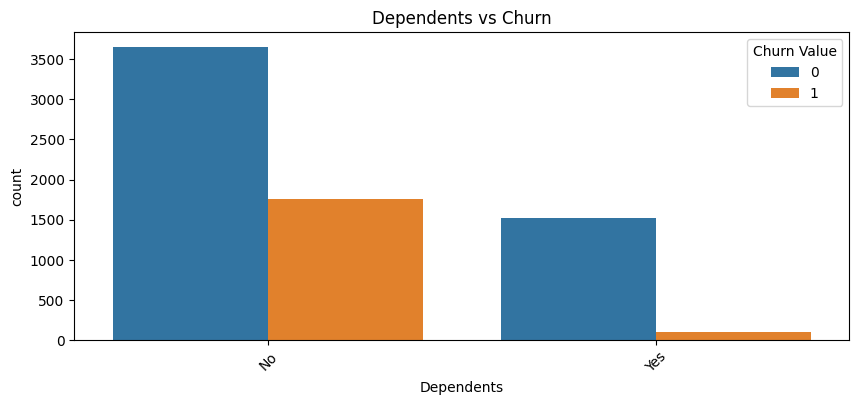

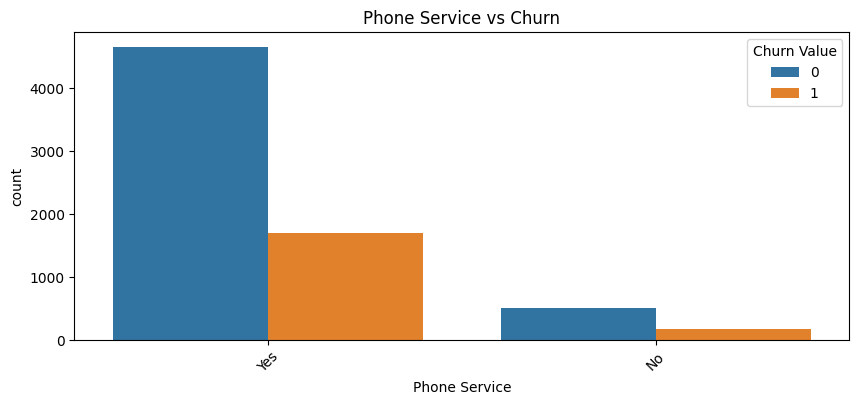

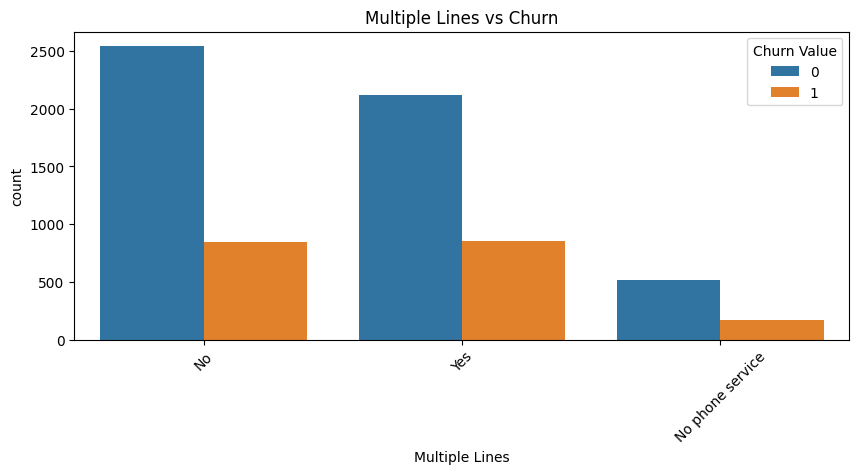

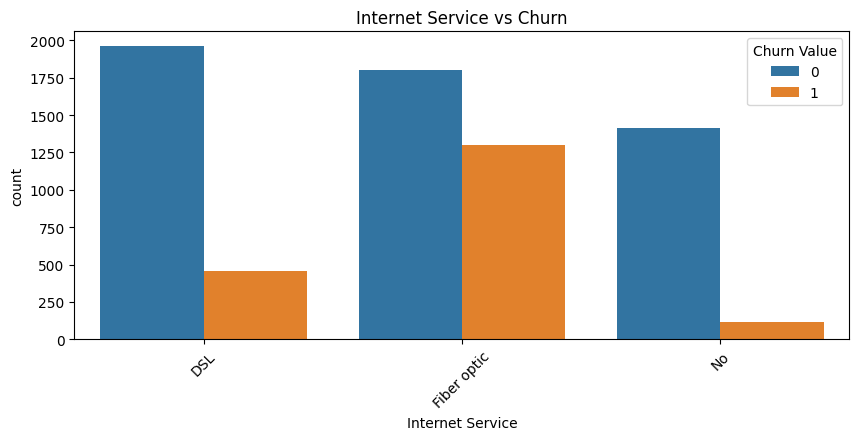

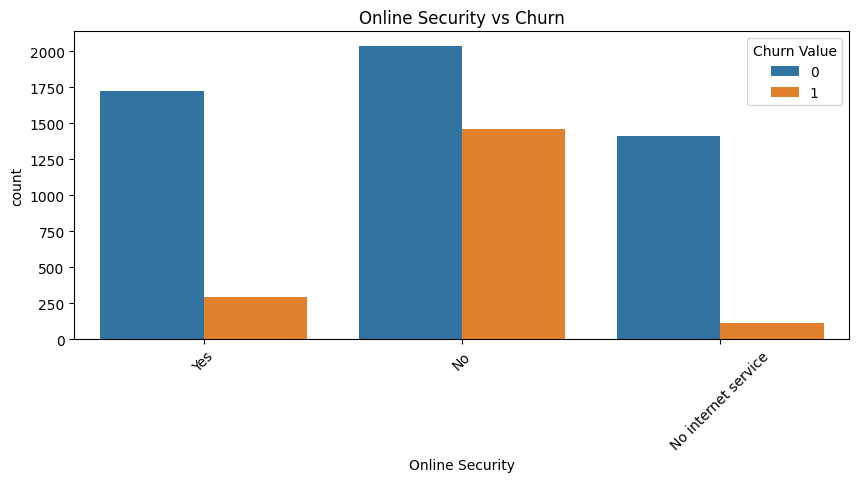

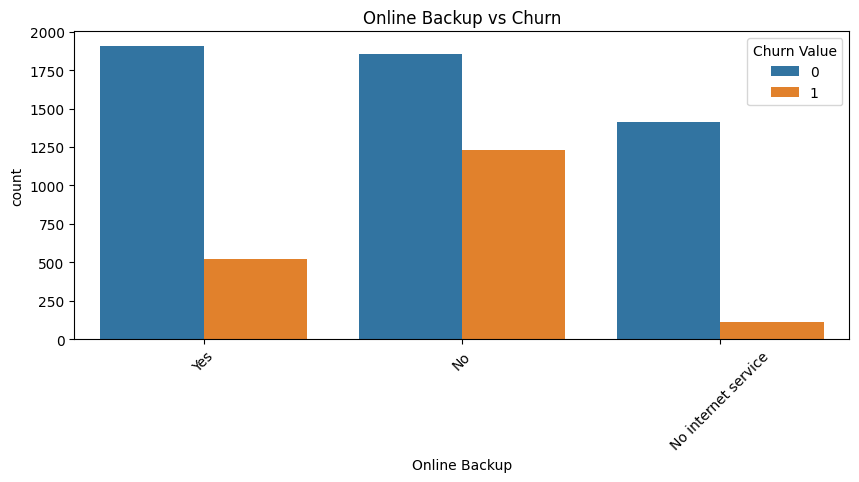

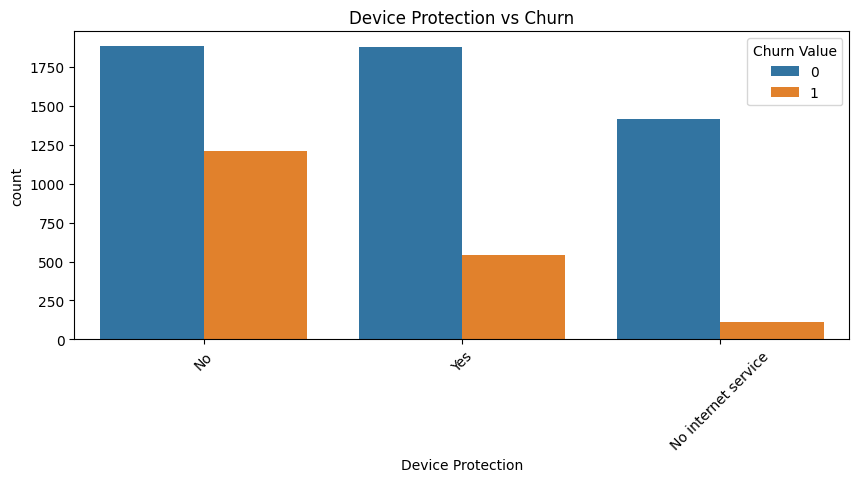

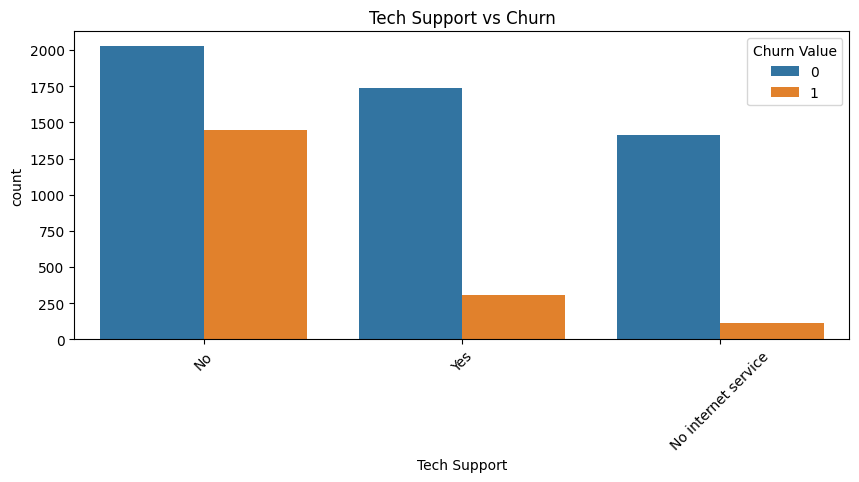

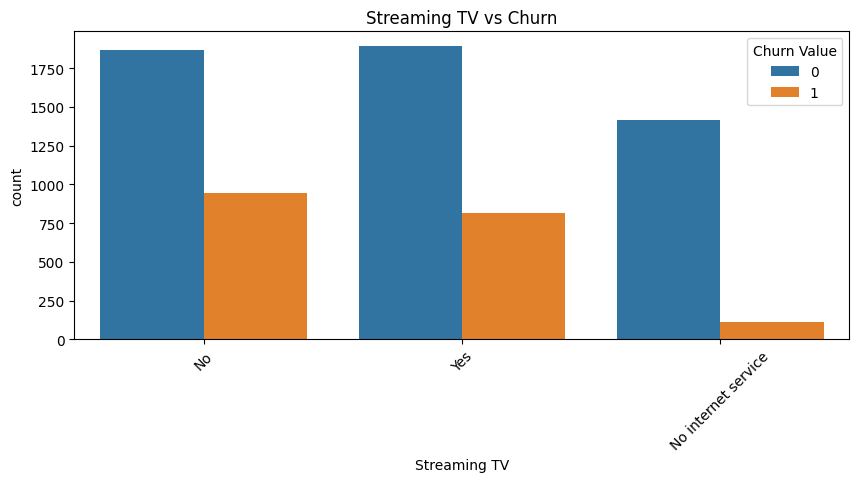

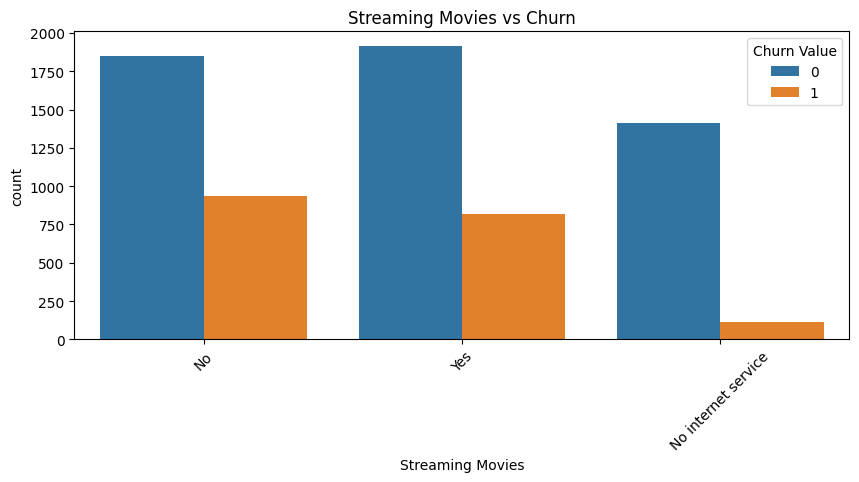

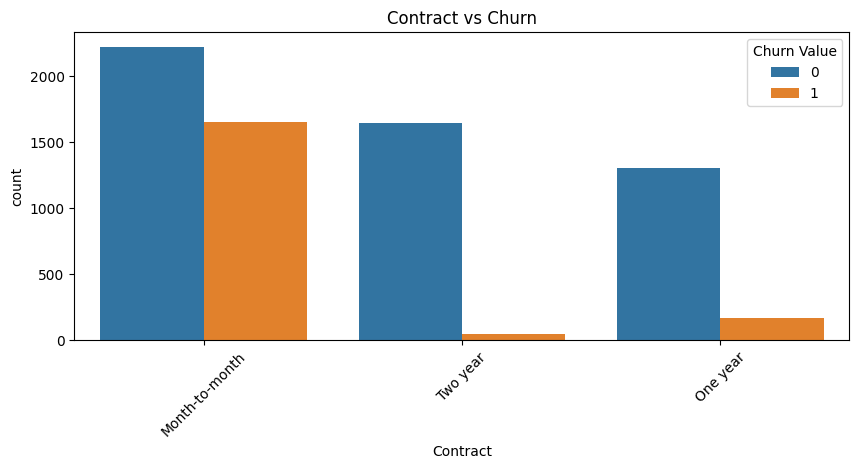

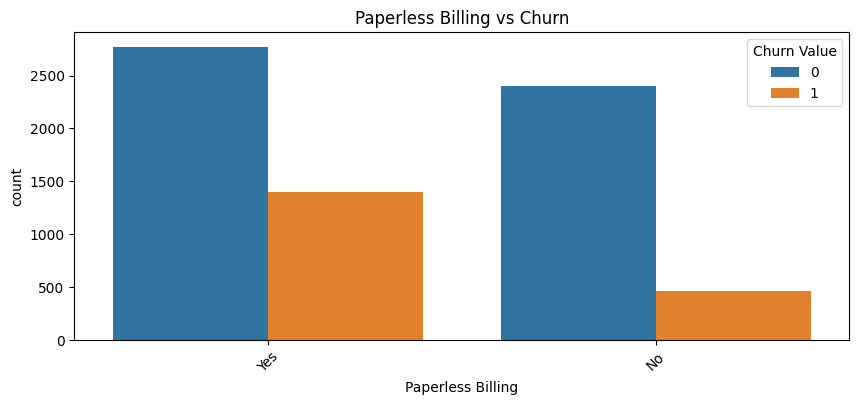

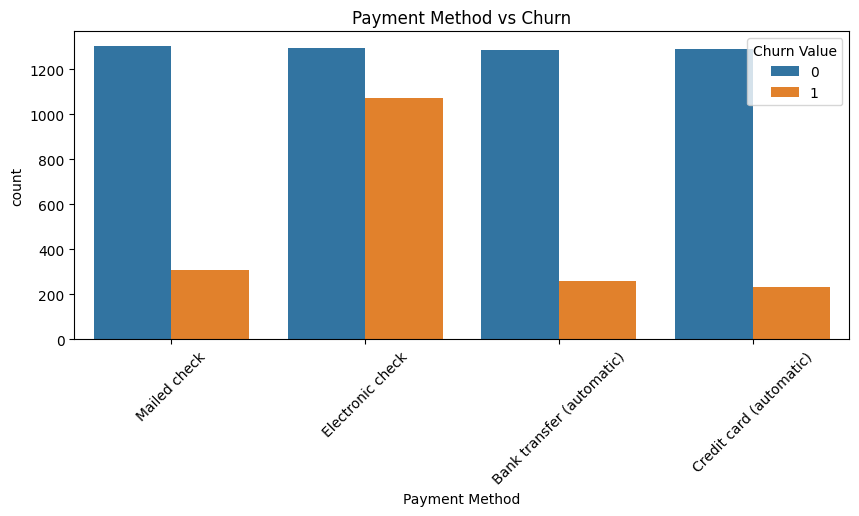

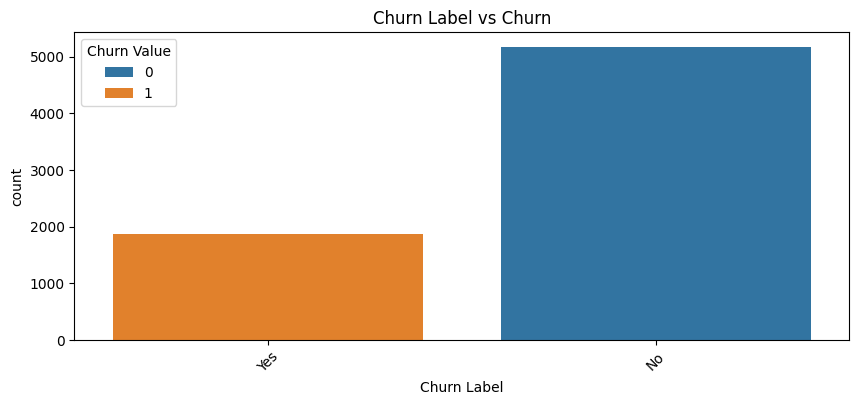

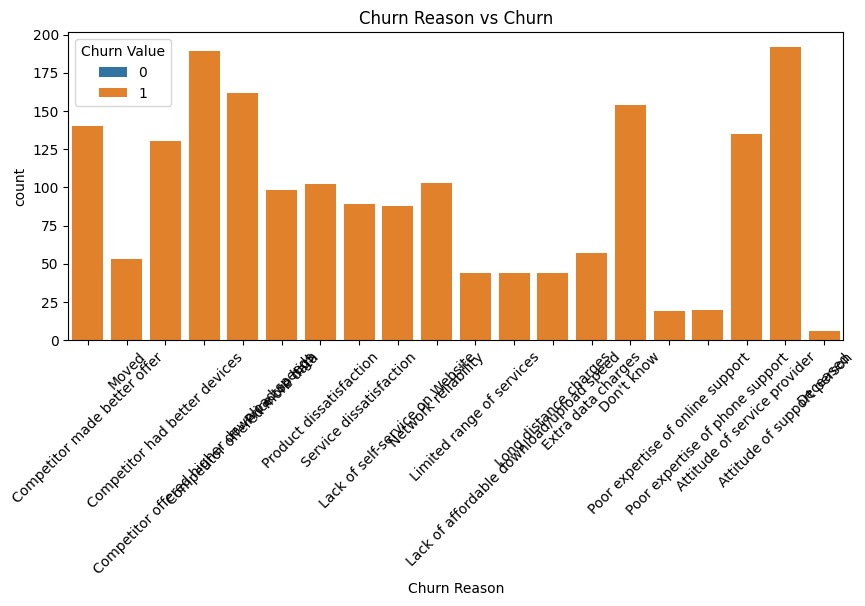

In [13]:
for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, hue="Churn Value", data=df)
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()


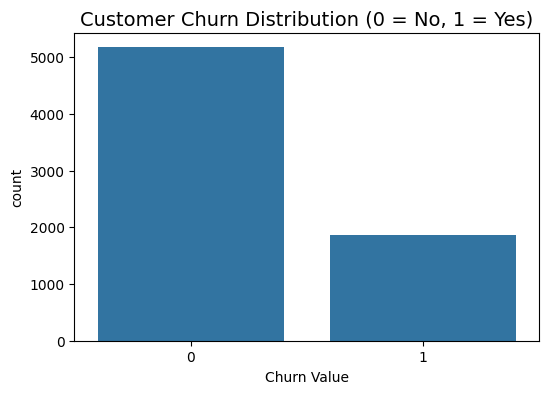

Churn Value
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x="Churn Value", data=df)
plt.title("Customer Churn Distribution (0 = No, 1 = Yes)", fontsize=14)
plt.show()

df["Churn Value"].value_counts(normalize=True)


In [15]:
cols_to_drop = [
    "CustomerID", "Count", "Country", "State", "City", "Zip Code",
    "Lat Long", "Latitude", "Longitude",
    "Churn Label", "Churn Score", "Churn Reason"
]

df = df.drop(columns=cols_to_drop, errors="ignore")
df.head()


,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3239
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2701
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,5372
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,5003
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,5340


In [16]:
df["Total Charges"] = df["Total Charges"].fillna(df["Total Charges"].median())


In [17]:
X = df.drop("Churn Value", axis=1)
y = df["Churn Value"]


In [18]:
X.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,3239
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,2701
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,5372
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,5003
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,5340


In [19]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn Value, dtype: int64

In [20]:
categorical_cols = X.select_dtypes(include=["object"]).columns
categorical_cols


Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'],
      dtype='object')

In [21]:
categorical_cols

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'],
      dtype='object')

In [22]:
# One-hot encode all categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)


In [23]:
X_encoded.head()


,Tenure Months,Monthly Charges,Total Charges,CLTV,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_No phone service,...,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,2,53.85,108.15,3239,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
1,2,70.70,151.65,2701,False,False,False,True,True,False,...,False,False,False,False,False,False,True,False,True,False
2,8,99.65,820.50,5372,False,False,False,True,True,False,...,False,True,False,True,False,False,True,False,True,False
3,28,104.80,3046.05,5003,False,False,True,True,True,False,...,False,True,False,True,False,False,True,False,True,False
4,49,103.70,5036.30,5340,True,False,False,True,True,False,...,False,True,False,True,False,False,True,False,False,False


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, 
    test_size=0.2,      # 20% test data
    random_state=42,    # ensures reproducibility
    stratify=y          # keeps churn ratio balanced between train/test
)


In [25]:
X_train.shape, X_test.shape
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)


(Churn Value
 0    0.734647
 1    0.265353
 Name: proportion, dtype: float64,
 Churn Value
 0    0.734564
 1    0.265436
 Name: proportion, dtype: float64)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Create the model
log_reg = LogisticRegression(max_iter=3000)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # probability of class 1


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 3000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=3000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_prob))


Accuracy: 0.8055358410220014

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.58      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:
 [[918 117]
 [157 217]]

ROC AUC Score: 0.8492856958330103


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Create model
rf = RandomForestClassifier(
    n_estimators=200,        # number of trees
    max_depth=None,         # trees grow fully
    random_state=42,
    class_weight="balanced" # handles class imbalance
)

# Train the model
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)[:, 1]


In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_rf_prob))


Accuracy: 0.794889992902768

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.79      1409


Confusion Matrix:
 [[935 100]
 [189 185]]

ROC AUC Score: 0.8426464129788938


In [31]:
pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 7.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [33]:
pip3 install upgrade pip

SyntaxError: invalid syntax (3689565955.py, line 1)

In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

xgb = XGBClassifier(
    n_estimators=300,      # number of trees
    learning_rate=0.05,   # smaller = slower but better learning
    max_depth=6,          # depth of each tree
    subsample=0.8,        # sample rows
    colsample_bytree=0.8, # sample features
    eval_metric="logloss",
    random_state=42
)

# Train
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb_prob = xgb.predict_proba(X_test)[:, 1]


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <ADFDEDDC-951B-34BE-87DB-F5CA2631E6D0> /Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file)"]


In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

gb = GradientBoostingClassifier(
    n_estimators=300,    # number of boosting stages (trees)
    learning_rate=0.05, # smaller = slower but usually better
    max_depth=3,        # depth of individual trees
    random_state=42
)

# Train
gb.fit(X_train, y_train)

# Predict
y_pred_gb = gb.predict(X_test)
y_pred_gb_prob = gb.predict_proba(X_test)[:, 1]


In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_gb_prob))


Accuracy: 0.7998580553584103

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409


Confusion Matrix:
 [[930 105]
 [177 197]]

ROC AUC Score: 0.8495453253765275


In [37]:
import pandas as pd

# Feature importances from Gradient Boosting
importances = pd.Series(gb.feature_importances_, index=X_train.columns)

# Sort from most to least important
importances_sorted = importances.sort_values(ascending=False)

# Show top 15
importances_sorted.head(15)


Tenure Months                      0.240662
Internet Service_Fiber optic       0.164795
Payment Method_Electronic check    0.105321
Dependents_Yes                     0.087596
Contract_Two year                  0.077873
Contract_One year                  0.064221
Total Charges                      0.062791
Monthly Charges                    0.047914
CLTV                               0.035332
Paperless Billing_Yes              0.018628
Online Security_Yes                0.014467
Tech Support_Yes                   0.011602
Internet Service_No                0.007327
Streaming Movies_Yes               0.006955
Partner_Yes                        0.006608
dtype: float64

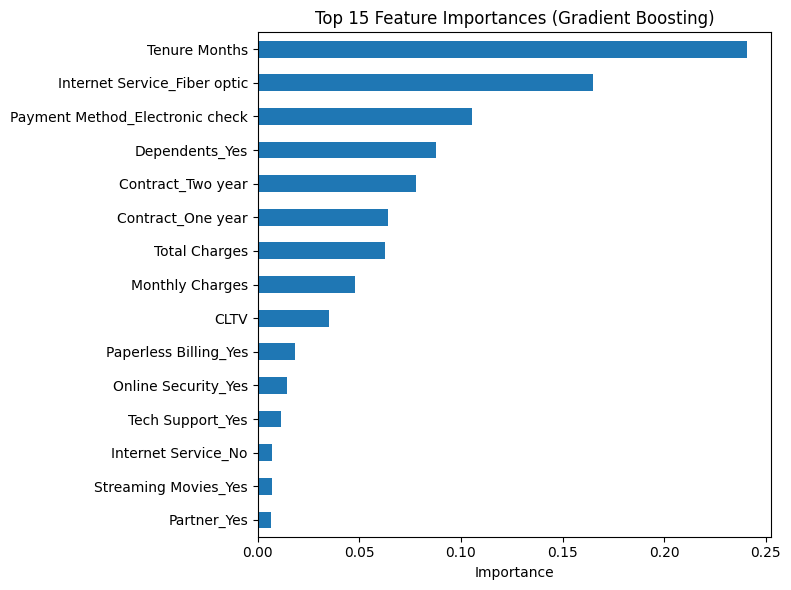

In [38]:
top_n = 15

plt.figure(figsize=(8, 6))
importances_sorted.head(top_n).plot(kind="barh")
plt.gca().invert_yaxis()  # most important at top
plt.title(f"Top {top_n} Feature Importances (Gradient Boosting)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [39]:
# Get predicted probabilities (already calculated earlier)
y_prob = y_pred_gb_prob  # just renaming for clarity

# Example: try a new threshold
threshold = 0.35
y_pred_threshold = (y_prob >= threshold).astype(int)


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Threshold:", threshold)
print("\nClassification Report:\n", classification_report(y_test, y_pred_threshold))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_threshold))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))


Threshold: 0.35

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      1035
           1       0.56      0.71      0.63       374

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.78      0.78      1409


Confusion Matrix:
 [[829 206]
 [110 264]]

ROC AUC Score: 0.8495453253765275


In [41]:
import numpy as np

thresholds = [0.5, 0.45, 0.40, 0.35, 0.30, 0.25]

for t in thresholds:
    preds = (y_prob >= t).astype(int)
    report = classification_report(y_test, preds, output_dict=True)
    recall_churn = report['1']['recall']
    precision_churn = report['1']['precision']

    print(f"Threshold = {t}")
    print(f"   Recall (Churn): {recall_churn:.3f}")
    print(f"   Precision (Churn): {precision_churn:.3f}")
    print("-" * 40)


Threshold = 0.5
   Recall (Churn): 0.527
   Precision (Churn): 0.652
----------------------------------------
Threshold = 0.45
   Recall (Churn): 0.596
   Precision (Churn): 0.616
----------------------------------------
Threshold = 0.4
   Recall (Churn): 0.655
   Precision (Churn): 0.589
----------------------------------------
Threshold = 0.35
   Recall (Churn): 0.706
   Precision (Churn): 0.562
----------------------------------------
Threshold = 0.3
   Recall (Churn): 0.759
   Precision (Churn): 0.538
----------------------------------------
Threshold = 0.25
   Recall (Churn): 0.813
   Precision (Churn): 0.513
----------------------------------------


In [42]:
from sklearn.metrics import classification_report, confusion_matrix

best_threshold = 0.35

y_pred_final = (y_prob >= best_threshold).astype(int)

print("Final chosen threshold:", best_threshold)
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_final))


Final chosen threshold: 0.35

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      1035
           1       0.56      0.71      0.63       374

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.78      0.78      1409


Confusion Matrix:
 [[829 206]
 [110 264]]


In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

# Identify column types
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocessing
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# Combine preprocessing + model
final_model = Pipeline(steps=[
    ("preprocessing", preprocess),
    ("model", GradientBoostingClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])

# Train the full pipeline
final_model.fit(X_train, y_train)


ValueError: A given column is not a column of the dataframe

In [44]:
from sklearn.model_selection import train_test_split

# Raw features (no get_dummies)
X_raw = df.drop("Churn Value", axis=1)
y = df["Churn Value"]

# Train-test split on RAW data
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_raw, y, test_size=0.2, random_state=42, stratify=y
)

X_raw.head()


,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,3239
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,2701
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,5372
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,5003
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,5340


In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

# Identify column types on RAW data
num_cols = X_raw.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_raw.select_dtypes(include=['object']).columns

# Preprocessing: scale numeric, one-hot encode categorical
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# Full pipeline
final_model = Pipeline(steps=[
    ("preprocessing", preprocess),
    ("model", GradientBoostingClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])

# Train pipeline on RAW train data
final_model.fit(X_train_raw, y_train_raw)


,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [46]:
from sklearn.metrics import classification_report

y_pred_pipe = final_model.predict(X_test_raw)
print(classification_report(y_test_raw, y_pred_pipe))


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [47]:
import os, joblib

os.makedirs("../models", exist_ok=True)

joblib.dump(final_model, "../models/telco_churn_model.pkl")
joblib.dump(0.35, "../models/decision_threshold.pkl")

print("Model and threshold saved!")


Model and threshold saved!


In [48]:
import pandas as pd
import joblib

new_customer = pd.DataFrame({
    "Gender": ["Female"],
    "Senior Citizen": ["No"],
    "Partner": ["No"],
    "Dependents": ["No"],
    "Tenure Months": [2],
    "Phone Service": ["Yes"],
    "Multiple Lines": ["No"],
    "Internet Service": ["Fiber optic"],
    "Online Security": ["No"],
    "Online Backup": ["No"],
    "Device Protection": ["No"],
    "Tech Support": ["No"],
    "Streaming TV": ["Yes"],
    "Streaming Movies": ["Yes"],
    "Contract": ["Month-to-month"],
    "Paperless Billing": ["Yes"],
    "Payment Method": ["Electronic check"],
    "Monthly Charges": [89.5],
    "Total Charges": [180.0],
    "CLTV": [2900]
})

model = joblib.load("../models/telco_churn_model.pkl")
threshold = joblib.load("../models/decision_threshold.pkl")

prob = model.predict_proba(new_customer)[0][1]
prediction = int(prob >= threshold)

print("Churn probability:", prob)
print("Prediction (1 = churn, 0 = no churn):", prediction)


Churn probability: 0.7679339000991761
Prediction (1 = churn, 0 = no churn): 1


In [1]:
import joblib

joblib.dump(gb, "../models/telco_churn_model.pkl")
print("Model saved!")


NameError: name 'gb' is not defined

In [2]:
import joblib

joblib.dump(final_model, "../models/telco_churn_model.pkl")
print("Model saved!")


NameError: name 'final_model' is not defined

In [3]:
final_model = Pipeline(steps=[
    ("preprocessing", preprocess),
    ("model", GradientBoostingClassifier(...))
])


NameError: name 'Pipeline' is not defined

In [4]:
final_model = Pipeline(steps=[
    ("preprocessing", preprocess),
    ("model", GradientBoostingClassifier(...))
])


NameError: name 'Pipeline' is not defined

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
import joblib


In [7]:
import pandas as pd

df = pd.read_excel("../data/raw/telco_churn.xlsx")
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [8]:
from sklearn.model_selection import train_test_split

X_raw = df.drop("Churn Value", axis=1)
y = df["Churn Value"]

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_raw, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
import joblib


In [10]:
num_cols = X_raw.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_raw.select_dtypes(include=['object']).columns


In [11]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)


In [12]:
final_model = Pipeline(steps=[
    ("preprocessing", preprocess),
    ("model", GradientBoostingClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])


In [13]:
final_model.fit(X_train_raw, y_train_raw)


TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['float', 'int', 'str']

In [14]:
import pandas as pd

df = pd.read_excel("../data/raw/telco_churn.xlsx")
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [15]:
# Convert to numeric
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")
df["Tenure Months"] = pd.to_numeric(df["Tenure Months"], errors="coerce")

# Fill missing Total Charges with median
df["Total Charges"] = df["Total Charges"].fillna(df["Total Charges"].median())

# Drop irrelevant / leakage columns
cols_to_drop = [
    "CustomerID", "Count", "Country", "State", "City", "Zip Code",
    "Lat Long", "Latitude", "Longitude",
    "Churn Label", "Churn Score", "Churn Reason"
]

df = df.drop(columns=cols_to_drop, errors="ignore")

df.head()


,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3239
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2701
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,5372
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,5003
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,5340


In [16]:
from sklearn.model_selection import train_test_split

# Separate features and target
X_raw = df.drop("Churn Value", axis=1)
y = df["Churn Value"]

# Train-test split (same as before)
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_raw, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train_raw.head()


,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV
4626,Male,No,No,No,35,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,2782
4192,Male,No,Yes,Yes,15,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,4634
5457,Male,No,Yes,Yes,13,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,2898
4717,Female,No,Yes,No,26,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.70,3596
4673,Male,No,Yes,Yes,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55,3408


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# Identify numeric and categorical columns
num_cols = X_raw.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_raw.select_dtypes(include=['object']).columns

num_cols, cat_cols


(Index(['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV'], dtype='object'),
 Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
        'Multiple Lines', 'Internet Service', 'Online Security',
        'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
        'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'],
       dtype='object'))

In [18]:
# 1) Build preprocessing pipeline
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# 2) Build full model pipeline
final_model = Pipeline(steps=[
    ("preprocessing", preprocess),
    ("model", GradientBoostingClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])

# 3) Fit the model
final_model.fit(X_train_raw, y_train_raw)

# 4) Save model and threshold
import os
os.makedirs("../models", exist_ok=True)

joblib.dump(final_model, "../models/telco_churn_model.pkl")
joblib.dump(0.35, "../models/decision_threshold.pkl")

print("Model and threshold saved successfully!")


Model and threshold saved successfully!
